In [1]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
import keras.backend as K
import numpy as np
import matplotlib.pyplot as plt
# datasets and models
from vecq.datasets import get_cifar10
from vecq.quantize_layers import Conv2D_Q,Dense_Q,DepthwiseConv2D_Q
from vecq.models import VGG7_N
from vecq.quantize_methods import uL2Q,VecQ

Using TensorFlow backend.


In [2]:
x_train,y_train,x_test,y_test=get_cifar10()
vgg_64=VGG_like(kq=VecQ(4),
           bq=VecQ(4),
           aq=None,
           activation='relu',
           after_activation=None)

Cifar10:  (50000, 32, 32, 3) (50000, 10) [1.0, 0.0]
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
vgg_like.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['acc'])
vgg_like.fit(x_train,y_train,epochs=10,batch_size=500,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 14s 275us/step - loss: 2.3786 - acc: 0.3710 - val_loss: 2.7578 - val_acc: 0.3152
Epoch 2/10
50000/50000 [==============================] - 8s 168us/step - loss: 1.8028 - acc: 0.5025 - val_loss: 1.7549 - val_acc: 0.5047
Epoch 3/10
50000/50000 [==============================] - 8s 167us/step - loss: 1.5608 - acc: 0.5671 - val_loss: 1.8008 - val_acc: 0.4909
Epoch 4/10
50000/50000 [==============================] - 8s 167us/step - loss: 1.3948 - acc: 0.6111 - val_loss: 1.6887 - val_acc: 0.5264
Epoch 5/10
50000/50000 [==============================] - 8s 168us/step - loss: 1.2661 - acc: 0.6501 - val_loss: 1.3127 - val_acc: 0.6319
Epoch 6/10
50000/50000 [==============================] - 8s 167us/step - loss: 1.1738 - acc: 0.6778 - val_loss: 1.3016 - val_acc: 0.6386
Epoch 7/10
50000/50000 [==============================] - 8s 168us/step -

alpha=0.014827


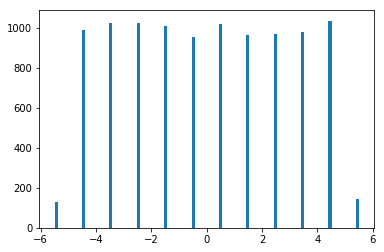

In [3]:
# Take layer 0 as an example
beta=K.get_value(vgg_like.layers[1].kq.beta)
alpha=K.get_value(vgg_like.layers[1].kq.alpha)
integer_weights=K.get_value(vgg_like.layers[1].kq.fixed)
print("alpha=%f"%alpha)
_=plt.hist(integer_weights.reshape(-1),bins=100)